# Journal de bord

In [2]:
#Importation des bibli pour la suite
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

## Mercredi 10 Février

idée projet : 
- simulation foule/ gaz/liquide

- lien entre grandeur thermo (S,U...) et "classique" (x,v,a...)

- Faire comparaison T_eq avec modele Thermo / Thermostat

- trouver état d'équilibre comment le definir ?

- calculer grandeur thermo comment calculer entropie ?

- A partir de combien de particule on tend bien vers température d'équilibre thermo ?

- L'état d'équilibre depend des conditions initiales ?


### Réalisation

- Définir bords

- (Défnir interaction simple entre molécules)

- Définir interaction particules / mur dans un premier temps. Type loi de Descartes ?

- utilisation d'objet ?

## Mercredi 24 Février

Changement : on essaie de modéliser une salle avec un mouvement de panique : en combien de temps les personnes parviennent-elles à sortir ? Quel est la géométrie optimale ?

Première idée de code :

En fait on part sur une programmation objet. Il faut coder objet personne et objet mur et objet sortie. La sortie applique une force aux personnes constante et en ligne droite. Chaque personne applique sur toutes les autres une force (decroissante en fonction de la distance). On a une matrice d'interaction : force entre chaque personne. On n'a besoin que de la partie triangulaire superieure (juste force opposée sur la partie inférieure).

In [1]:
class personne:
    """
    caractéristiques :
    position x,y
    vitesse vx,vy
    (mouvement oui ou non)
    rayon r
    masse m
    """
    def __init__(self,x,y,vx,vy,r,m):
        """Définition des parametre initiaux"""
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.r = r
        self.m = m
        
    def distance(self,autre):
        """Retourne la distance entre la particule et une autre"""
        dx = self.x - autre.x
        dy = self.y - autre.y
        return np.sqrt(dx**2+dy**2)
    
    def superpose(self,autre):
        """Retourne True si les deux particules se superposent"""
        answer = distance(self,autre) < self.r + autre.r
        return answer
        
    def force(self,autre):
        
        

In [11]:
def distance(personneA,personneB):
    """retourne la distance entre deux personne : personneA et personneB"""
    dx = personneB.x - personneA.x
    dy = personneB.y - personneA.y
    return np.sqrt(dx**2+dy**2)

In [12]:
def force(personneA,personneB):
    """Retourne la force (répulsive) qu'applique la personneA sur la personneB"""
    F = -1/distance(personneA,personneB)**7

## Mercredi 3 mars

Nous continuons de definir la classe personne. Ajout de distance et superpose. Nous continuons de comprendre l'animation.
Nous devons dans un premier temps tester notre code sur 3 particules : pour voir si ça marche.

## Mercredi 10 mars

Nous définissions la force repulsive entre les particules. Nous décidons de garder les informations de chaque particules en classe. Cependant, on choisi de regrouper leur position, vitesse, acceleration et masse respective dans un tableau. En effet le traitement de ces données sera plus simple avec numpy plutot que d'aller chercher les caractéroistiques de chaque particule à chaque pas de temps, pour toutes les particules. Les calculs seront plus simple : moins de boucle for.

fonction force codée entre deux particule avec un rayon de detection.

Faire un tableau de toute les forces, d'une molécule sur l'autre (tableau symétrique triangulaire avec 0 sur diagonale.

Comment appeler une particule connaissant son numéro ?

pour être plus efficace pour la suite on pourra faire a chaque intant une liste des voisins et calculer la force seulement pour ces voisins (rayon de detection +10%)

(À CODER PLUS TARD)

## Lundi 15 mars

Partie graphique. L'affichage graphique utilise la fonction Funcanimate de la librairie matplotlib.animation. La fonction prend en argument la figure (fig) sur laquelle l'animation va être affiché, un fonction (animate) donnant les positions des points à afficher pour chaque pas de temps. Dans notre cas la fonction animate utilise une fonction positions pour savoir ou sont les parrticules à un instant. La fonction calcule ensuite des points à afficher autour du centre de la particule pour donner à la particule l'apparence d'un cercle. La fonction positions peut-être remplacé par un tableau si tout les calculs de positions ont été fait précédemment.

<IPython.core.display.Javascript object>


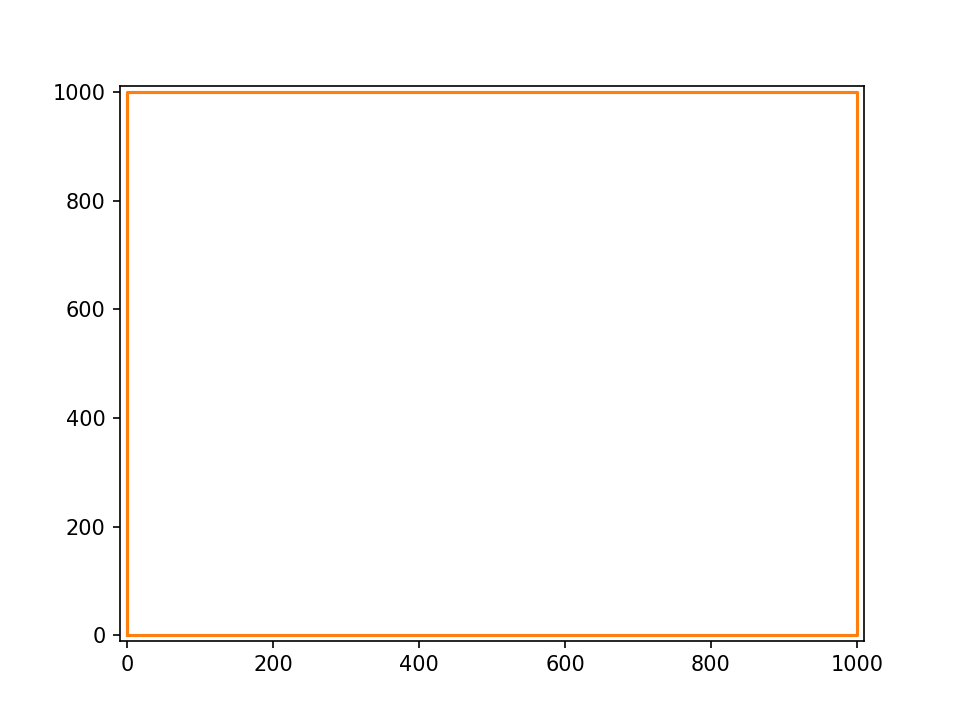

In [3]:
%matplotlib notebook

def animate(i,n=20,R=20):
    M=positions(i)
    angles=np.linspace(0,2*np.pi,n)
    Lx=np.array([])
    Ly=np.array([])
    for J in M:
        (xc,yc)=J
        Lx=np.hstack((Lx,R*np.cos(angles)+xc))
        Ly=np.hstack((Ly,R*np.sin(angles)+yc))
    line.set_data(Lx,Ly)
    return line,

# exemple

def positions(i):
    return [(i,2*i),(2*i,i),(6*i+500,-5*i+500),(0.5*i+900,-2*i+900)]
   
M=[0,1000,1000,0,0]
N=[0,0,1000,1000,0]
fig=plt.figure(1)
fig.set_sizes=(10,10)
plt.xlim(-10,1010)
plt.ylim(-10,1010)
line, = plt.plot([],[],'.')
plt.plot(M,N)
ani = anim.FuncAnimation(fig, animate, frames=1000, blit=True, interval=5, repeat=False)

## Mercredi 17 mars

Le code va se structurer ainsi :
-La classe personne regroupera toutes les paramètres et méthodes d'une personne et sera indexé dans un tableau.
-Un second tableau contiendra lui les positions et les vitesses de toutes les personnes à l'instant considéré. Ces ce tableau qui permettra les calculs de forces, d'accélérations. Un second tableau de ce type pour l'instant précédent est aussi nécessaire.
-Un historique des différentes position sera tenu sur un fichier texte. Ce fichier sera lu en fin de programme pour l'animation.

La fonction de calcul des forces est faites ainsi que celles liés à la lecture et écriture de fichier. L'intégrateur a été fait cette scéance aussi.

In [ ]:
def acceleration(F_tab,classe_tab):
    
    """Calcul un tableau contenant les accélérations de chaque particules
selon chaque axes. La forme du tableau est donc (n,2)"""
        
    sumF_tab=np.sum(F_tab,axis=0)
    a_tab=sumF_tab+classe_tab.m
    
    return a_tab

def change_posvi(PosVi_tab,PosViprec_tab,F_tab,classe_tab,dt,n):
    
    """Calcul les vitesses des particules au nouveau pas de temps"""
    a_tab=acceleration(F_tab,classe_tab)
    PosViprec_tab , PosVi_tab = PosVi_tab , np.concatenate((np.reshape(2*PosVi_tab[:,0,:]-PosViprec_tab[:,0,:]+a_tab*dt**2,(n,1,2)),np.reshape(PosViprec_tab[:,1,:]+2*a_tab*dt,(n,1,2))),axis=1)
    
    return PosViprec_tab , PosVi_tab